<a href="https://colab.research.google.com/github/hauduong05/ML_basics/blob/main/fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/credit_data

/content/drive/MyDrive/credit_data


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.isnull().sum().max()

0

In [ ]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')
print('-' * 20)
df['Class'].value_counts()

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset
--------------------


0    284315
1       492
Name: Class, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Class', axis=1)
y = df['Class']

X_train_org, X_test_org, y_train_org, y_test_org = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42, shuffle=True)

# Random Undersampling

In [ ]:
df = df.sample(frac=1)

fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
104768,69221.0,-0.936472,-0.741492,1.158675,-1.153602,0.222437,-0.739389,-0.082655,0.188970,-1.606748,...,-0.205064,-0.556905,0.185990,-0.014143,-0.337723,0.980770,-0.023966,0.100356,60.00,0
150601,93742.0,-3.291125,4.401194,-8.394212,4.453580,-4.790055,-4.240182,-9.219001,1.974030,-2.912943,...,2.102343,0.597370,-0.328086,0.445752,0.585281,-0.399005,2.116004,1.050744,1.00,1
21606,31760.0,1.397098,-0.971070,-0.617762,-1.794479,1.006023,3.537281,-1.577218,0.925590,-0.545320,...,0.339545,0.750597,-0.154032,1.050101,0.583371,-0.036169,0.037247,0.022252,29.00,0
42009,40919.0,-2.740483,3.658095,-4.110636,5.340242,-2.666775,-0.092782,-4.388699,-0.280133,-2.821895,...,2.417495,-0.097712,0.382155,-0.154757,-0.403956,0.277895,0.830062,0.218690,112.33,1
6529,7891.0,-1.585505,3.261585,-4.137422,2.357096,-1.405043,-1.879437,-3.513687,1.515607,-1.207166,...,0.501543,-0.546869,-0.076584,-0.425550,0.123644,0.321985,0.264028,0.132817,1.00,1


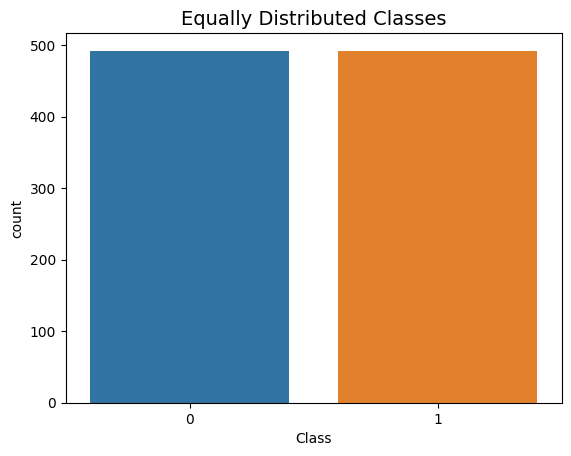

In [ ]:
sns.countplot(new_df, x='Class')
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

In [ ]:
X = new_df.drop('Class', axis=1)
y = new_df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

classifiers = {
    "LogisiticRegression": LogisticRegression(max_iter=1000),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [ ]:
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 93.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 64.0 % accuracy score
Classifiers:  SVC Has a training score of 54.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 91.0 % accuracy score


In [ ]:
from sklearn.model_selection import GridSearchCV


log_reg_params = {"penalty": ['l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}


grid_log_reg = GridSearchCV(LogisticRegression(max_iter=10000), log_reg_params)
grid_log_reg.fit(X_train, y_train)
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
knears_neighbors = grid_knears.best_estimator_

# svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
# grid_svc = GridSearchCV(SVC(), svc_params)
# grid_svc.fit(X_train, y_train)

# svc = grid_svc.best_estimator_

# tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)),
#               "min_samples_leaf": list(range(5,7,1))}
# grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
# grid_tree.fit(X_train, y_train)

# tree_clf = grid_tree.best_estimator_

In [ ]:
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

# svc_score = cross_val_score(svc, X_train, y_train, cv=5)
# print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

# tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
# print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  94.15%
Knears Neighbors Cross Validation Score 63.02%


In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

svc = SVC()
svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,
                             method="decision_function")

tree_clf = DecisionTreeClassifier()
tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))

Logistic Regression:  0.980563635188417
KNears Neighbors:  0.6303341736151509
Support Vector Classifier:  0.5955206515415938
Decision Tree Classifier:  0.9199179109301273


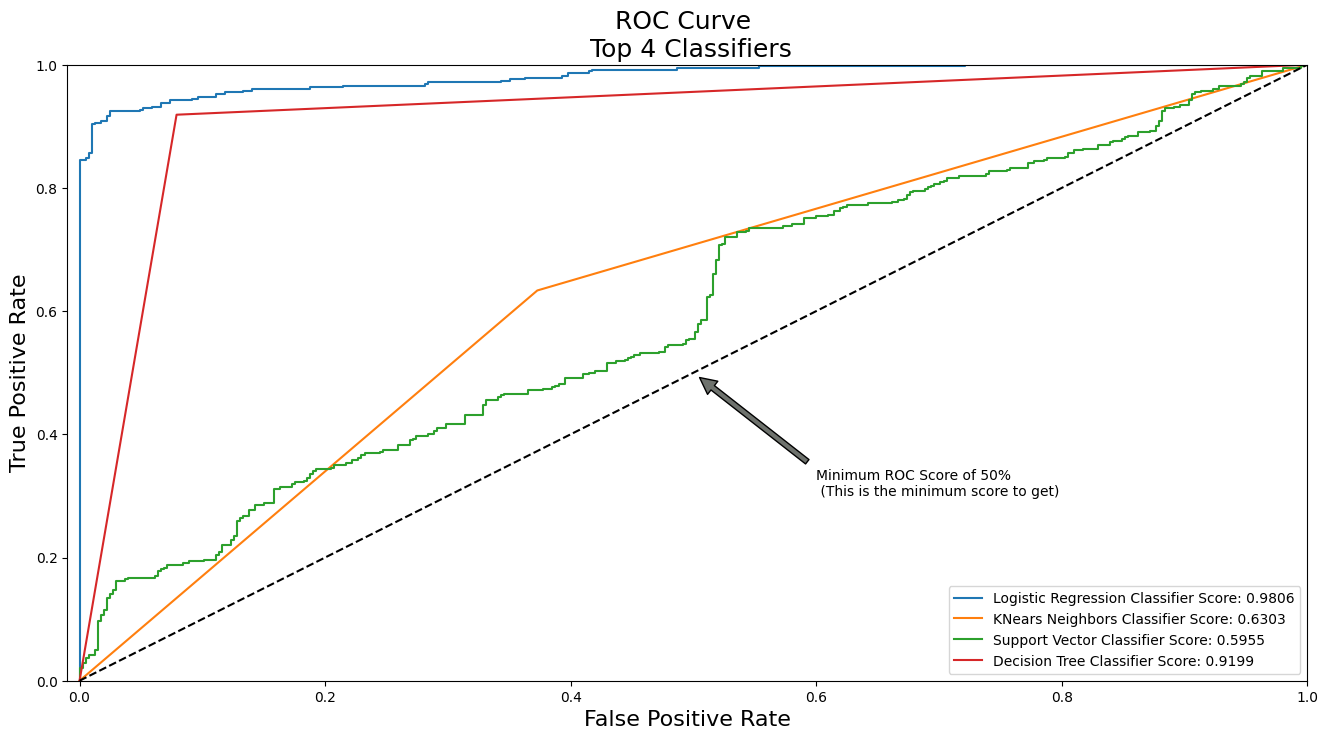

In [ ]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()

graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
y_pred = log_reg.predict(X_train)

print('---' * 45)
print('Undersampling score: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('---' * 45)

---------------------------------------------------------------------------------------------------------------------------------------
Undersampling score: 

Recall Score: 0.92
Precision Score: 0.96
F1 Score: 0.94
Accuracy Score: 0.95
---------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
y_pred = log_reg.predict(X_test)

print('---' * 45)
print('Undersampling test set: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_test, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('---' * 45)

---------------------------------------------------------------------------------------------------------------------------------------
Undersampling test set: 

Recall Score: 0.87
Precision Score: 0.99
F1 Score: 0.93
Accuracy Score: 0.92
---------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
y_pred = log_reg.predict(X_test_org)

print('---' * 45)
print('Original test set: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_test_org, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test_org, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_test_org, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test_org, y_pred)))
print('---' * 45)

---------------------------------------------------------------------------------------------------------------------------------------
Original test set: 

Recall Score: 0.92
Precision Score: 0.04
F1 Score: 0.07
Accuracy Score: 0.96
---------------------------------------------------------------------------------------------------------------------------------------


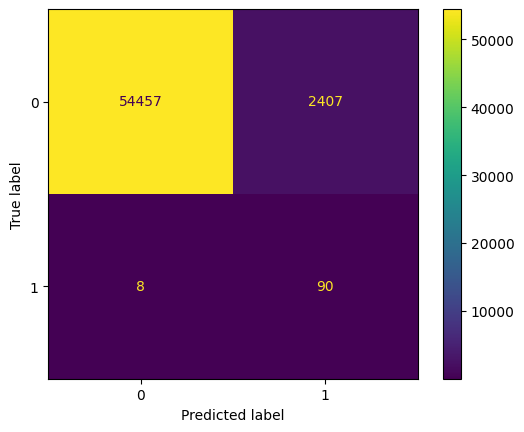

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

confusion = confusion_matrix(y_test_org, y_pred)
disp = ConfusionMatrixDisplay(confusion)
disp.plot()

# Oversampling

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)

Xsm_train, ysm_train = sm.fit_resample(X_train_org, y_train_org)

In [ ]:
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(Xsm_train, ysm_train)
y_pred = log_reg.predict(X_test_org)

print('---' * 45)
print('Original test set: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_test_org, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test_org, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_test_org, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test_org, y_pred)))
print('---' * 45)

---------------------------------------------------------------------------------------------------------------------------------------
Original test set: 

Recall Score: 0.91
Precision Score: 0.09
F1 Score: 0.16
Accuracy Score: 0.98
---------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
n_inputs = Xsm_train.shape[1]

oversample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])


In [ ]:
oversample_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
oversample_model.fit(Xsm_train, ysm_train, validation_split=0.2, batch_size=300, epochs=5, shuffle=True, verbose=2)


Epoch 1/5
1214/1214 - 4s - loss: 75.5201 - accuracy: 0.6410 - val_loss: 32.6019 - val_accuracy: 0.5016 - 4s/epoch - 3ms/step
Epoch 2/5
1214/1214 - 3s - loss: 15.1683 - accuracy: 0.7539 - val_loss: 75.4800 - val_accuracy: 0.4445 - 3s/epoch - 2ms/step
Epoch 3/5
1214/1214 - 3s - loss: 10.1230 - accuracy: 0.8336 - val_loss: 25.4788 - val_accuracy: 0.6493 - 3s/epoch - 2ms/step
Epoch 4/5
1214/1214 - 3s - loss: 8.0157 - accuracy: 0.8698 - val_loss: 22.8141 - val_accuracy: 0.7226 - 3s/epoch - 3ms/step
Epoch 5/5
1214/1214 - 4s - loss: 7.1596 - accuracy: 0.8896 - val_loss: 0.7245 - val_accuracy: 0.9640 - 4s/epoch - 3ms/step


In [ ]:
oversample_predictions = oversample_model.predict(X_test_org, batch_size=200, verbose=0)


In [ ]:
oversample_fraud_predictions = oversample_model.predict(X_test_org, batch_size=200, verbose=0)
y_pred=np.argmax(oversample_fraud_predictions,axis=1)


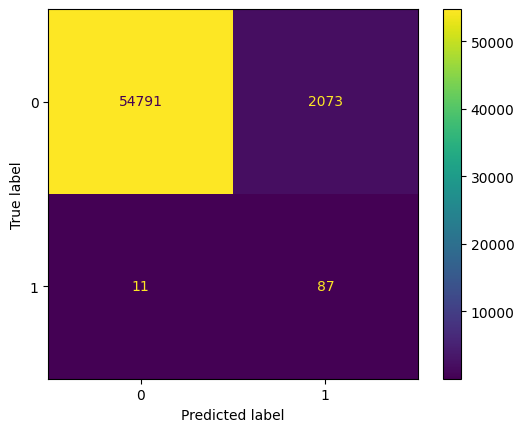

In [ ]:
confusion = confusion_matrix(y_test_org, y_pred)
disp = ConfusionMatrixDisplay(confusion)
disp.plot()
